In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
import sys, os

path = os.path.join(os.path.dirname("classification"), '..', '')
sys.path.insert(1, path)
print(sys.path)

from multilayer_perceptron.NeuralNet import NeuralNet
import multilayer_perceptron.srcs.utils as utils
from multilayer_perceptron.srcs.losses import BCELoss
from multilayer_perceptron.srcs.layers import Dense
import multilayer_perceptron.srcs.optimizers as optimizers

# 1. Dataset

## 1-1. Circular dataset

X shape:  (1000, 2)
y shape:  (1000, 1)


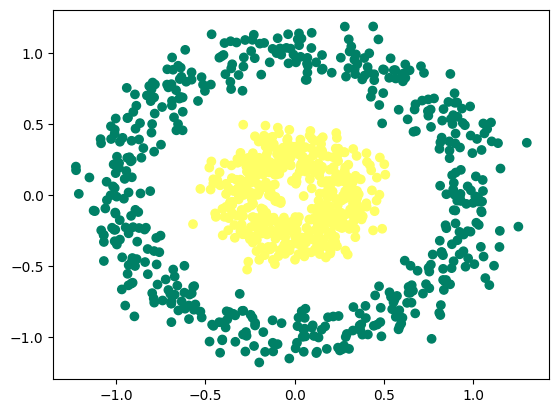

In [2]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X
y = y.reshape((y.shape[0], 1))

print("X shape: ", X.shape)
print("y shape: ", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

## Dataset preprocessing

In [3]:
data = np.hstack((X, y))
print(data.shape, data[:5])

(1000, 3) [[ 0.34226877  0.02953448  1.        ]
 [ 0.02435936 -0.15465885  1.        ]
 [-0.78677748 -0.75718576  0.        ]
 [ 0.08269604  0.1929581   1.        ]
 [-0.21979463  0.23370973  1.        ]]


In [4]:

data_train, data_val = utils.data_spliter(data, 0.8, 0)
data_train, data_test = utils.data_spliter(data_train, 0.9, 0)

print(data_train.shape, data_val.shape, data_test.shape)

x_train, y_train = data_train[:, :2], data_train[:, 2:]
x_val, y_val = data_val[:, :2], data_val[:, 2:]
x_test , y_test = data_test[:, :2], data_test[:, 2:]

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(720, 3) (200, 3) (80, 3)
(720, 2) (200, 2) (80, 2)
(720, 1) (200, 1) (80, 1)


### Plot training dataset

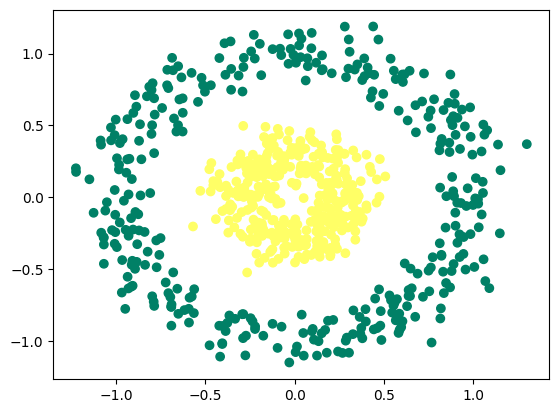

In [5]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="summer")
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="summer")
# plt.scatter(data_train[:, 0], data_train[:, 1], c=data_train[:, 2], cmap="summer")
# plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap="summer")
plt.show()

# 2. Multilayer Perceptron

## 2-1. helper functions

### 2-1-1. plot learning curves function

In [6]:
def plot_learning_curves(X, y, model, history):
    # Generate input data for decision boundary plot
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Calculate output for each input pair
    z_grid = np.array([[model.predict(np.array([[x1, x2]]))[0, 0] for x1 in x1_range] for x2 in x2_range])

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.plot(history["loss"], label="train loss")
    if "val_loss" in history:
        plt.plot(history["val_loss"], label="valid loss")
    plt.title("Loss")
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(history["accuracy"], label="train accuracy")
    if "val_loss" in history:
        plt.plot(history["val_accuracy"], label="valid accuracy")
    plt.title("Accuracy")
    plt.legend()
    
    # Plotting decision boundary
    plt.subplot(1, 3, 3)
    plt.contourf(x1_grid, x2_grid, z_grid, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar()

    # Plot the dataset points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

### 2-1-2. train model function

In [7]:
def train_model(x_train, y_train, 
      model,
      optimizer, 
      loss, 
      metrics,
      batch_size,
      epochs,
      validation_data,
      ):
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)

    net = model.fit(x_train, y_train, validation_data=validation_data, 
                    batch_size=batch_size, 
                    epochs=epochs)
    return net

### 2-1-3. test model function

In [62]:
def test_model(x_test, y_test,
       model,
       ):
    plot_learning_curves(X, y, model, model.history)
    print(f"train accuracy: {model.history['accuracy'][-1]:.4f}")
    print(f"validation accuracy: {model.history['val_accuracy'][-1]:.4f}")

    y_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"test accuracy: {test_acc}")

## 2-2. Evaluation

### 2-2-0. set hyperparameters

In [9]:
lr = 1e-3
batch_size = None
epochs = 30

optimizer = optimizers.SGD(learning_rate=lr)
loss = BCELoss()
metrics = ['accuracy']
validation_data = (x_val, y_val)

### 2-2-1. 1-layer perceptron

In [202]:
model = NeuralNet()
network = model.create_network([
    Dense(2, 1, activation='sigmoid')
    ])

In [203]:
model = train_model(x_train, y_train,
      model,
      optimizer,
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data)


Epoch 01/30 - loss: 0.7434 - accuracy: 0.4931 - val_loss: 0.7789 - val_accuracy: 0.4650
Epoch 02/30 - loss: 0.7390 - accuracy: 0.4931 - val_loss: 0.7731 - val_accuracy: 0.4700
Epoch 03/30 - loss: 0.7349 - accuracy: 0.5000 - val_loss: 0.7676 - val_accuracy: 0.4850
Epoch 04/30 - loss: 0.7312 - accuracy: 0.5042 - val_loss: 0.7626 - val_accuracy: 0.4850
Epoch 05/30 - loss: 0.7278 - accuracy: 0.5056 - val_loss: 0.7578 - val_accuracy: 0.4900
Epoch 06/30 - loss: 0.7247 - accuracy: 0.5083 - val_loss: 0.7535 - val_accuracy: 0.5000
Epoch 07/30 - loss: 0.7218 - accuracy: 0.5097 - val_loss: 0.7494 - val_accuracy: 0.5000
Epoch 08/30 - loss: 0.7192 - accuracy: 0.5125 - val_loss: 0.7456 - val_accuracy: 0.5000
Epoch 09/30 - loss: 0.7168 - accuracy: 0.5167 - val_loss: 0.7420 - val_accuracy: 0.5000
Epoch 10/30 - loss: 0.7146 - accuracy: 0.5194 - val_loss: 0.7388 - val_accuracy: 0.4950
Epoch 11/30 - loss: 0.7126 - accuracy: 0.5194 - val_loss: 0.7357 - val_accuracy: 0.5050
Epoch 12/30 - loss: 0.7108 - ac

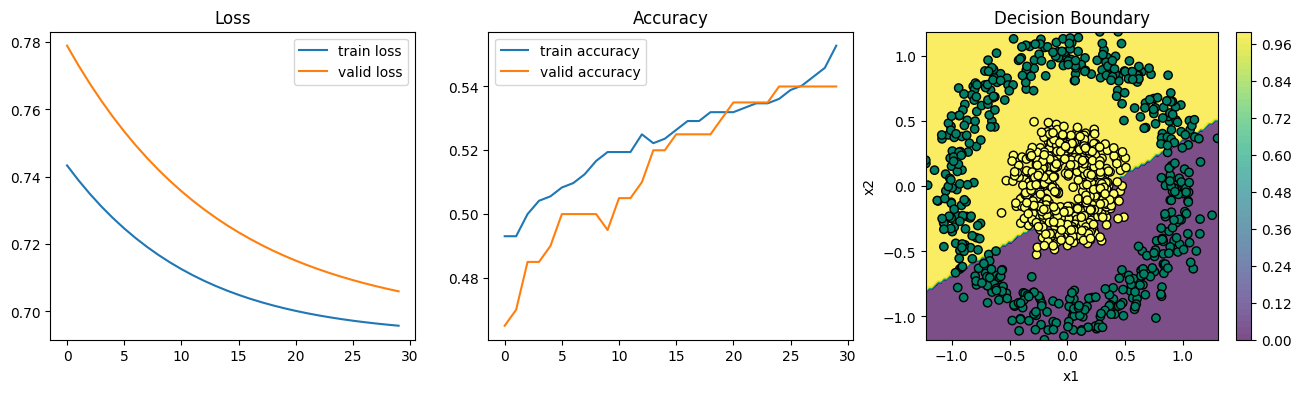

train accuracy:  0.5527777777777778
valid accuracy:  0.54
test accuracy: 0.5625


In [204]:
test_model(x_test, y_test, model)

### 2-2-2. 2-layer multilayer perceptron

In [199]:
network = model.create_network([
    Dense(2, 2, activation='relu'),
    Dense(2, 1, activation='sigmoid')
    ])

In [200]:
model = train_model(x_train, y_train,
      model,
      optimizer,
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data)


Epoch 01/30 - loss: 0.7279 - accuracy: 0.5014 - val_loss: 0.7005 - val_accuracy: 0.5300
Epoch 02/30 - loss: 0.7152 - accuracy: 0.5111 - val_loss: 0.6894 - val_accuracy: 0.5550
Epoch 03/30 - loss: 0.7047 - accuracy: 0.5167 - val_loss: 0.6799 - val_accuracy: 0.5650
Epoch 04/30 - loss: 0.6956 - accuracy: 0.5306 - val_loss: 0.6715 - val_accuracy: 0.5950
Epoch 05/30 - loss: 0.6876 - accuracy: 0.5389 - val_loss: 0.6640 - val_accuracy: 0.5950
Epoch 06/30 - loss: 0.6804 - accuracy: 0.5444 - val_loss: 0.6571 - val_accuracy: 0.6050
Epoch 07/30 - loss: 0.6739 - accuracy: 0.5528 - val_loss: 0.6507 - val_accuracy: 0.6150
Epoch 08/30 - loss: 0.6679 - accuracy: 0.5625 - val_loss: 0.6448 - val_accuracy: 0.6250
Epoch 09/30 - loss: 0.6623 - accuracy: 0.5708 - val_loss: 0.6391 - val_accuracy: 0.6300
Epoch 10/30 - loss: 0.6570 - accuracy: 0.5847 - val_loss: 0.6337 - val_accuracy: 0.6250
Epoch 11/30 - loss: 0.6520 - accuracy: 0.5917 - val_loss: 0.6285 - val_accuracy: 0.6350
Epoch 12/30 - loss: 0.6473 - ac

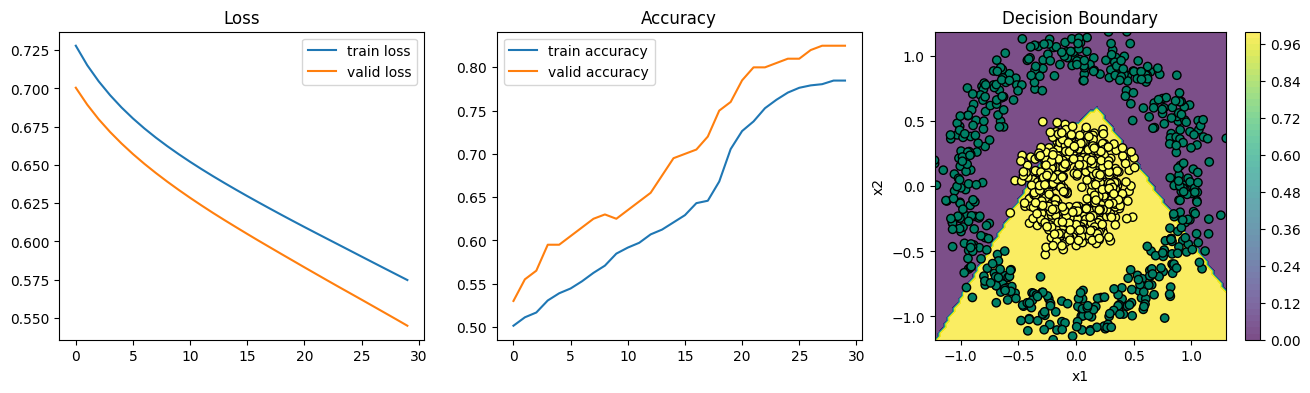

train accuracy:  0.7847222222222222
valid accuracy:  0.825
test accuracy: 0.7375


In [201]:
test_model(x_test, y_test, model)

### 2-2-3. 3-layer multilayer perceptron

In [ ]:
model = NeuralNet()
network = model.create_network([
    Dense(2, 4, activation='relu'),
    Dense(4, 3, activation='relu'),
    Dense(3, 1, activation='sigmoid')
    ])

In [191]:
model = train_model(x_train, y_train,
      model,
      optimizer,
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data)


Epoch 01/30 - loss: 0.6856 - accuracy: 0.4972 - val_loss: 0.6770 - val_accuracy: 0.6600
Epoch 02/30 - loss: 0.6772 - accuracy: 0.6194 - val_loss: 0.6671 - val_accuracy: 0.7650
Epoch 03/30 - loss: 0.6692 - accuracy: 0.6944 - val_loss: 0.6573 - val_accuracy: 0.8050
Epoch 04/30 - loss: 0.6613 - accuracy: 0.7375 - val_loss: 0.6478 - val_accuracy: 0.8350
Epoch 05/30 - loss: 0.6535 - accuracy: 0.7792 - val_loss: 0.6381 - val_accuracy: 0.8450
Epoch 06/30 - loss: 0.6455 - accuracy: 0.7986 - val_loss: 0.6282 - val_accuracy: 0.8400
Epoch 07/30 - loss: 0.6372 - accuracy: 0.8139 - val_loss: 0.6180 - val_accuracy: 0.8650
Epoch 08/30 - loss: 0.6285 - accuracy: 0.8181 - val_loss: 0.6072 - val_accuracy: 0.8700
Epoch 09/30 - loss: 0.6192 - accuracy: 0.8250 - val_loss: 0.5956 - val_accuracy: 0.8700
Epoch 10/30 - loss: 0.6090 - accuracy: 0.8278 - val_loss: 0.5827 - val_accuracy: 0.8750
Epoch 11/30 - loss: 0.5975 - accuracy: 0.8306 - val_loss: 0.5687 - val_accuracy: 0.8800
Epoch 12/30 - loss: 0.5846 - ac

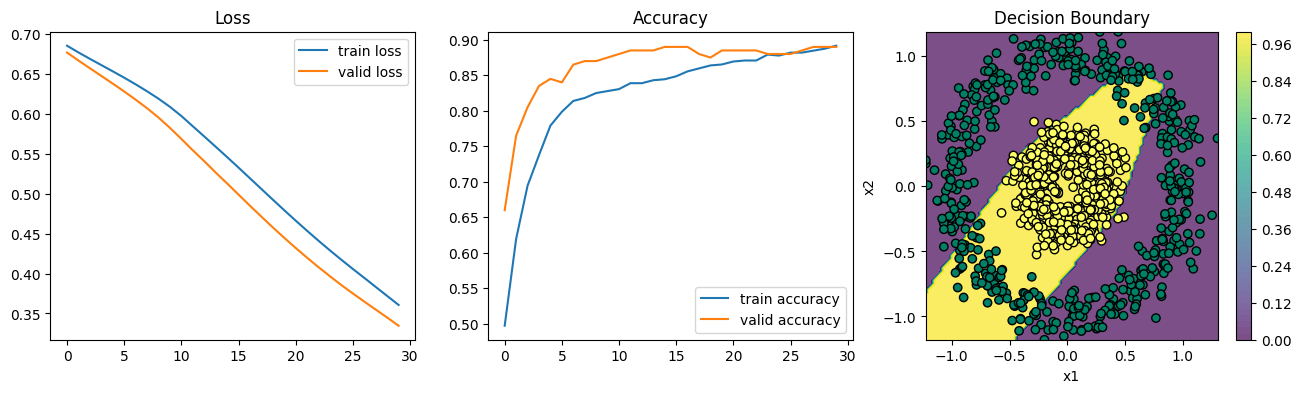

train accuracy:  0.8916666666666667
valid accuracy:  0.89
test accuracy: 0.8


In [192]:
test_model(x_test, y_test, model)

### 2-2-4. 4-layer multilayer perceptron

In [58]:
model = NeuralNet()
network = model.create_network([
    Dense(2, 10, activation='relu'),
    Dense(10, 8, activation='relu'),
    Dense(8, 5, activation='relu'),
    Dense(5, 1, activation='sigmoid')
    ])

print(model)

In [59]:
model = train_model(x_train, y_train,
      model,
      optimizer,
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data)


Epoch 01/30 - loss: 0.6610 - accuracy: 0.4889 - val_loss: 0.6581 - val_accuracy: 0.6550
Epoch 02/30 - loss: 0.6543 - accuracy: 0.6528 - val_loss: 0.6517 - val_accuracy: 0.6800
Epoch 03/30 - loss: 0.6472 - accuracy: 0.7278 - val_loss: 0.6443 - val_accuracy: 0.7100
Epoch 04/30 - loss: 0.6391 - accuracy: 0.7583 - val_loss: 0.6357 - val_accuracy: 0.7200
Epoch 05/30 - loss: 0.6297 - accuracy: 0.7792 - val_loss: 0.6255 - val_accuracy: 0.7350
Epoch 06/30 - loss: 0.6187 - accuracy: 0.8042 - val_loss: 0.6131 - val_accuracy: 0.7550
Epoch 07/30 - loss: 0.6056 - accuracy: 0.8194 - val_loss: 0.5987 - val_accuracy: 0.7700
Epoch 08/30 - loss: 0.5902 - accuracy: 0.8486 - val_loss: 0.5816 - val_accuracy: 0.8050
Epoch 09/30 - loss: 0.5720 - accuracy: 0.8750 - val_loss: 0.5616 - val_accuracy: 0.8400
Epoch 10/30 - loss: 0.5509 - accuracy: 0.9042 - val_loss: 0.5386 - val_accuracy: 0.8750
Epoch 11/30 - loss: 0.5267 - accuracy: 0.9181 - val_loss: 0.5128 - val_accuracy: 0.8950
Epoch 12/30 - loss: 0.4999 - ac

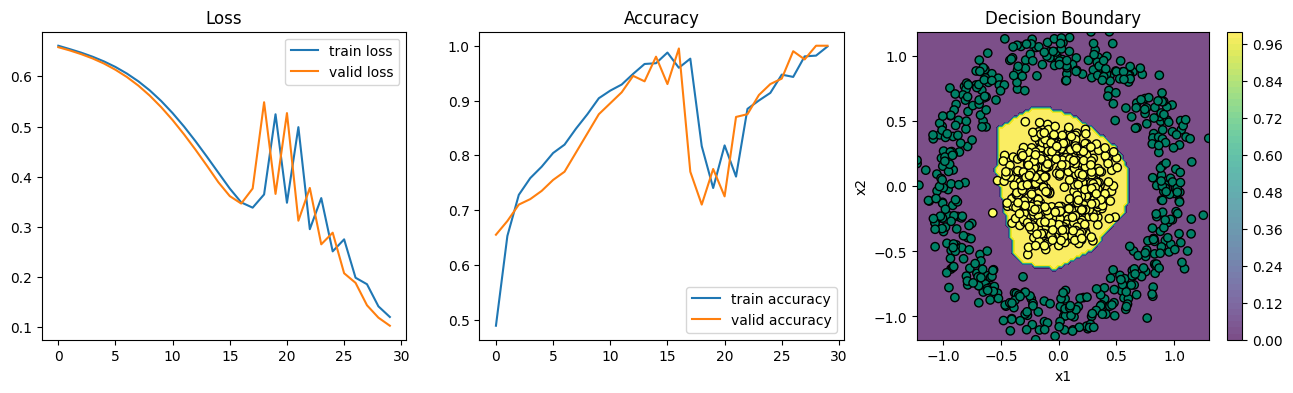

train accuracy: 0.9986
validation accuracy: 1.0000
test accuracy: 1.0


In [63]:
test_model(x_test, y_test, model)